In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("health care diabetes.csv")

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.shape

(768, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
zero_to_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_to_null] = df[zero_to_null].replace(0, np.nan)

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [28]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [30]:
bins = [20, 30, 40, 50, 60, float('inf')]
labels = ['21-30', '31-40', '41-50', '51-60', 'above 60']
df['Age_Group'] = pd.cut(df['Age'],bins=bins,labels=labels,include_lowest=True)
insulin_median= df.groupby('Age_Group')['Insulin'].median()
print(insulin_median)

Age_Group
21-30       105.0
31-40       140.0
41-50       131.0
51-60       207.0
above 60    180.0
Name: Insulin, dtype: float64


In [39]:
insulin_values = {
    '21-30': 105,
    '31-40': 140,
    '41-50': 131,
    '51-60': 207,
    'above 60': 180
}
df['Insulin'] = df.apply(
    lambda x: insulin_values[x['Age_Group']]
    if pd.isna(x['Insulin']) else x['Insulin'],
    axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group
0,6,148.0,72.0,35.00000,131.0,33.6,0.627,50,1,41-50
1,1,85.0,66.0,29.00000,140.0,26.6,0.351,31,0,31-40
2,8,183.0,64.0,29.15342,140.0,23.3,0.672,32,1,31-40
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0,21-30
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1,31-40


In [40]:
fillna_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[fillna_mean] = df[fillna_mean].fillna(
    df[fillna_mean].mean())
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_Group                   0
dtype: int64

<AxesSubplot:>

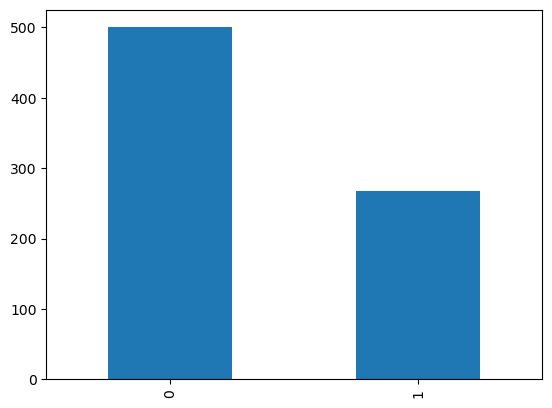

In [41]:
df['Outcome'].value_counts().plot(kind='bar')

In [33]:
!pip install imbalanced-learn 

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
data_X = df.drop(['Outcome','Age_Group'], axis=1)
data_y = df['Outcome']

In [44]:
X_resampled, y_resampled = SMOTE(random_state=100).fit_resample(data_X, data_y)
print(X_resampled.shape, y_resampled.shape)

(1000, 8) (1000,)


<AxesSubplot:>

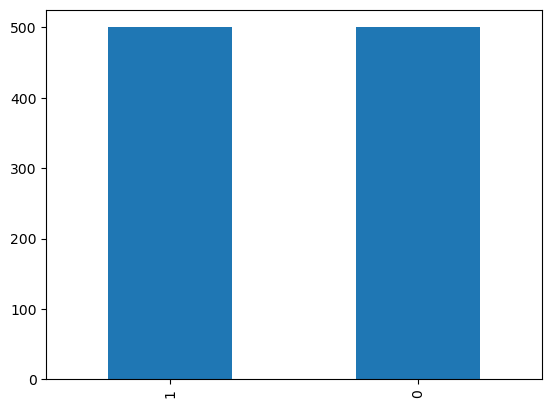

In [45]:
y_resampled.value_counts().plot(kind='bar')

In [46]:
data_resampled = pd.concat([X_resampled, y_resampled],axis=1)
data_resampled.shape

(1000, 9)

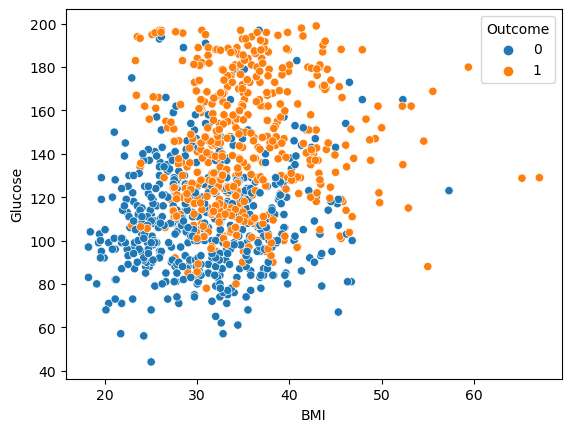

In [47]:
sns.scatterplot(x="BMI", y="Glucose", data=data_resampled, hue="Outcome");

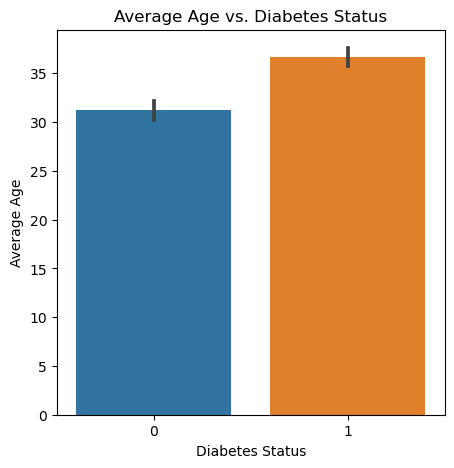

In [48]:
plt.figure(figsize=(5, 5))
sns.barplot(x=data_resampled['Outcome'], y=data_resampled['Age'])
plt.xlabel("Diabetes Status")
plt.ylabel("Average Age")
plt.title("Average Age vs. Diabetes Status")
plt.show()

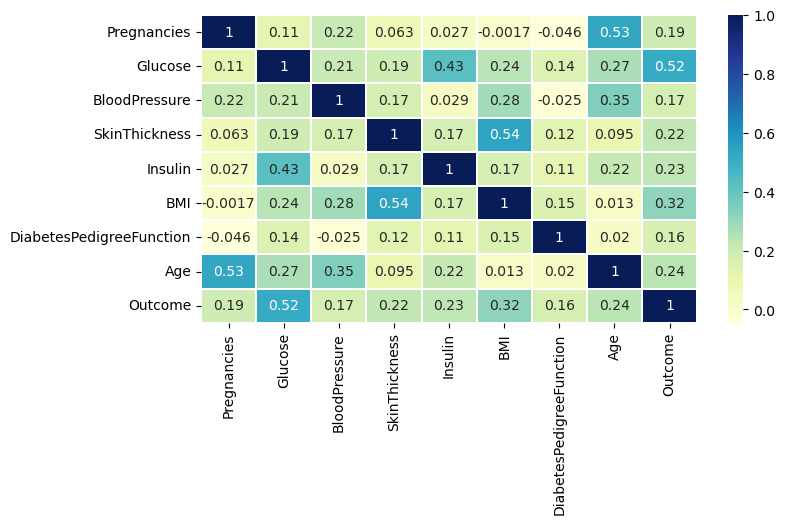

In [49]:
sns.heatmap(data_resampled.corr(),annot=True, cmap='YlGnBu', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,4)
plt.show()

In [50]:
data_resampled.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Get the column names of the resampled data (excluding the target column)

columns = data_resampled.columns[:-1]
scaled_data = sc.fit_transform(data_resampled[columns])
diabetes_data_sc = pd.DataFrame(scaled_data, columns= columns)
diabetes_data_sc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.636169,0.674491,-0.076432,0.648324,-0.210513,0.081380,0.448508,1.402507
1,-0.897507,-1.336990,-0.589807,-0.076048,-0.115817,-0.959876,-0.403452,-0.253654
2,1.249639,1.791981,-0.760932,-0.057525,-0.115817,-1.450754,0.587414,-0.166488
3,-0.897507,-1.209277,-0.589807,-0.800419,-0.599819,-0.736750,-0.971425,-1.125318
4,-1.204242,0.323280,-2.814432,0.648324,0.178792,1.494513,5.575700,-0.079321


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = diabetes_data_sc
y = data_resampled['Outcome']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 100)

In [53]:
logistic_classifier = LogisticRegression(solver='liblinear')

logistic_classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [54]:
y_predict = logistic_classifier.predict(X_test)

In [55]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_predict)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       104
           1       0.74      0.69      0.71        96

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

Confusion Matrix:
 [[81 23]
 [30 66]]


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', random_state=100, verbose=0)

In [57]:
# Create an SVM classifier (you can choose the kernel type, e.g., 'linear', 'rbf', 'poly', etc.)
svm_classifier = SVC(kernel='linear', C=1)  # Example with a linear kernel and regularization parameter C=1

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [58]:
y_predi = svm_classifier.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predi)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_predi)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predi)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       104
           1       0.75      0.70      0.72        96

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

Confusion Matrix:
 [[82 22]
 [29 67]]


In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# Create a KNN classifier (specify the number of neighbors, e.g., n_neighbors=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [62]:
y_predic = knn_classifier.predict(X_test)

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predic)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_predic)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predic)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       104
           1       0.72      0.91      0.81        96

    accuracy                           0.79       200
   macro avg       0.81      0.79      0.79       200
weighted avg       0.81      0.79      0.79       200

Confusion Matrix:
 [[71 33]
 [ 9 87]]
